Name: Dibya Chudal Khanal



Student id: 1001995207

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [57]:
import os
print(os.listdir()) 


['.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.p2', '.spyder-py3', '.ssh', '.VirtualBox', '.vscode', 'Airplane craashes since 1908.ipynb', 'Amazon_DataAnalysis.ipynb', 'AppData', 'Application Data', 'Assignment 1.ipynb', 'Bitcoin.ipynb', 'Bitcoin_Analysis.ipynb', 'Contacts', 'Cookies', 'CovidData.ipynb', 'CovidDataAnalysis.ipynb', 'diabetes.csv', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'Favorites', 'HotelBooking.ipynb', 'Jedi', 'Links', 'Local Settings', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'NTUSER.dat', 'NTUSER.dat.bak.{0F9ECD29-0C5A-461F-81AD-B878DF86FA21}', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.dat{d9d4214e-f946-11ed-9b57-806e6f6e6963}.TM.blf', 'NTUSER.dat{d9d4214e-f946-11ed-9b57-806e6f6e6963}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.dat{d9d4214e-f946-11ed-9b57-806e6f6e6963}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'p

In [58]:
df = pd.read_csv("diabetes.csv")
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
#Your code to get descriptive statistics goes below this
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
#use value counts with normalize = True to get the proportion of 0s and 1s
#code goes below this line
# Get the proportion of 0s and 1s in the Outcome column
proportion_outcome = df['Outcome'].value_counts(normalize=True)

# Display the proportions
print(proportion_outcome) 


0    0.651042
1    0.348958
Name: Outcome, dtype: float64


In [61]:
#Check for missing values - code below
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values) 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


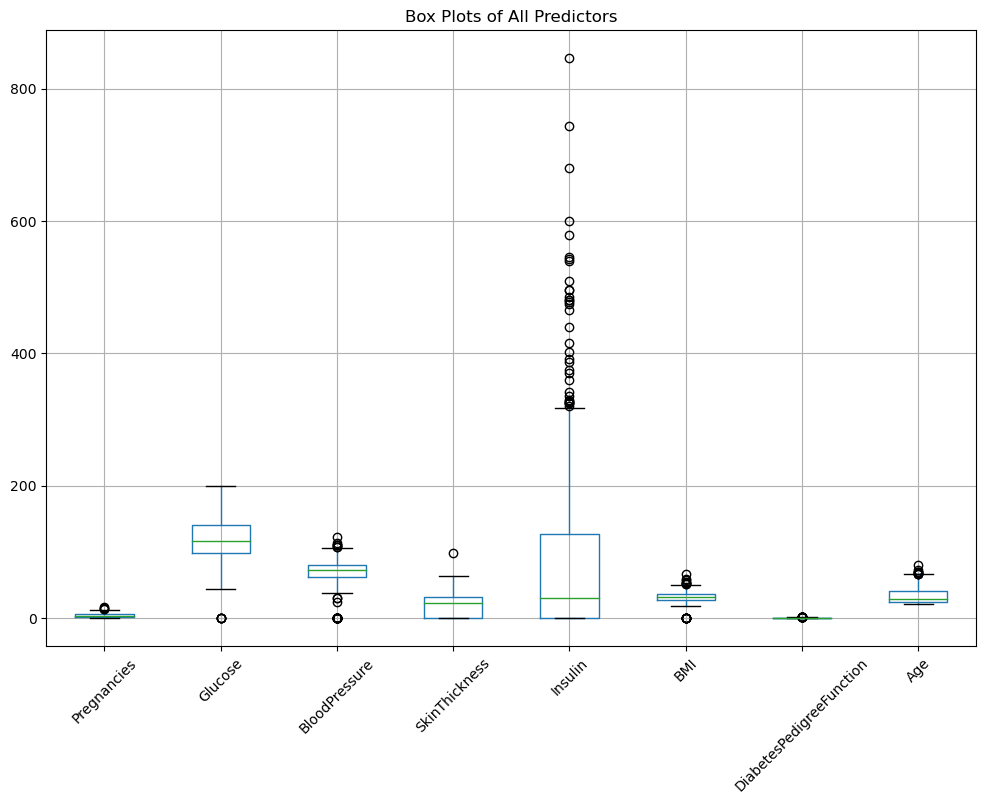

In [62]:
#Generate Box Plots of all your predictors - code goes below this line

# Generate box plots for all predictors
df.iloc[:, :-1].boxplot(figsize=(12, 8))  # Excluding the Outcome column

# Display the plot
plt.title('Box Plots of All Predictors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show() 


In [63]:
#Iterate through your predictors and drop your outliers - that is, you will only
#include rows that are between a lower bound and an upper bound where
#lower_bound = q1 - (1.5 * iqr)
#upper_bound = q3 + (1.5 * iqr)
#Your code goes below this line
# Calculate the IQR and remove outliers for each predictor

# Function to remove outliers from predictors
def remove_outliers(df):
    # Create a copy of the predictors (excluding the Outcome column)
    cleaned_df = df.iloc[:, :-1].copy()  # Only predictors
    
    # Loop through each column (predictors only) to remove outliers
    for column in cleaned_df.columns:
        q1 = cleaned_df[column].quantile(0.25)
        q3 = cleaned_df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Filter rows within the bounds
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

# Apply the outlier removal function to predictors only
cleaned_predictors_df = remove_outliers(df)  # Only predictors are cleaned

# Display the original and cleaned dataset shapes
print("Original shape:", df.shape)  
print("Cleaned shape:", cleaned_predictors_df.shape) 


Original shape: (768, 9)
Cleaned shape: (636, 8)


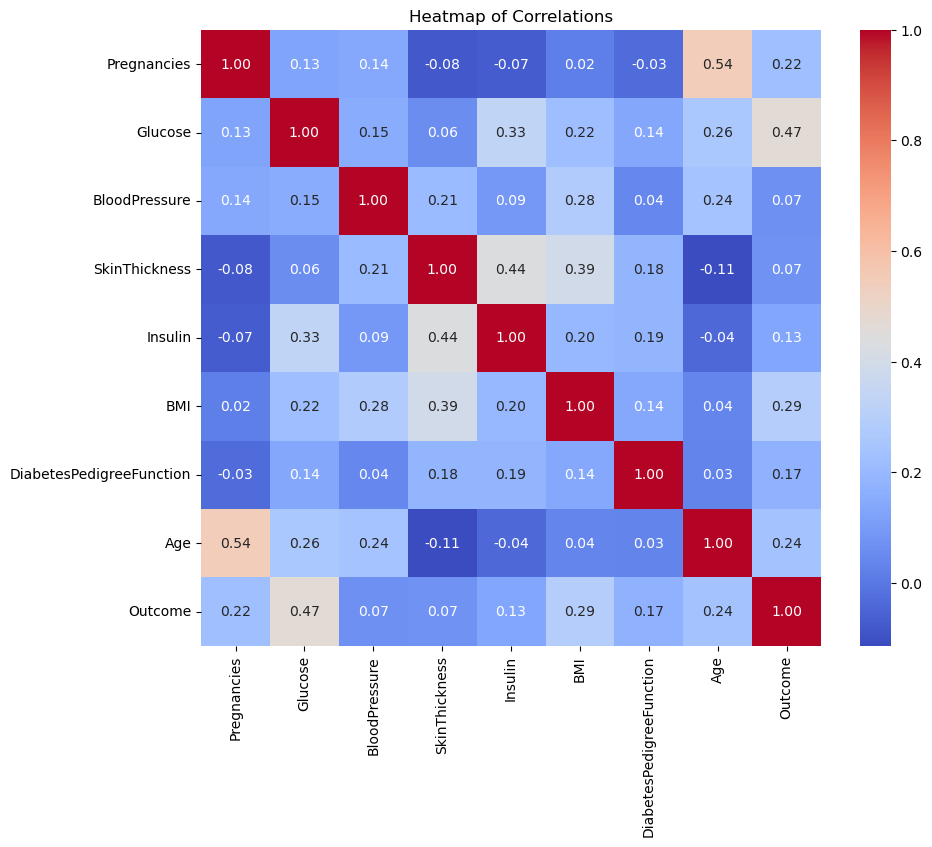

In [64]:
#Get correlations and pass it on to a function like sns.heatmap to get a heatmap of the correlations
#Your code goes here
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.title('Heatmap of Correlations')
plt.show() 





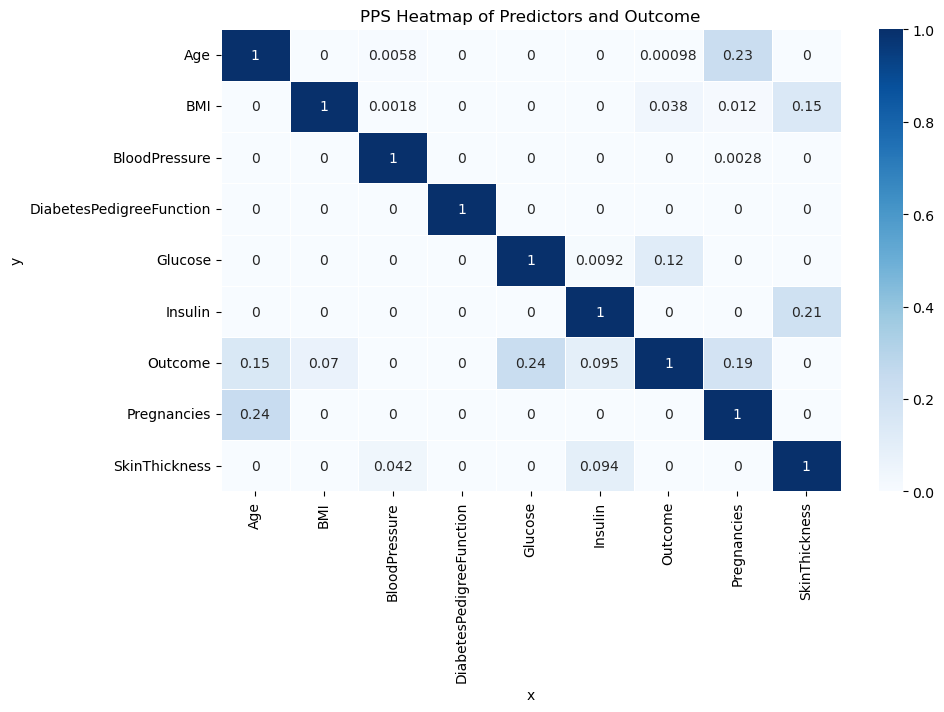

x             Age      BMI  BloodPressure  DiabetesPedigreeFunction   Glucose  \
y                                                                               
Outcome  0.149656  0.06976            0.0                       0.0  0.237706   

x         Insulin  Outcome  Pregnancies  SkinThickness  
y                                                       
Outcome  0.094827      1.0      0.18507            0.0  


In [65]:
# Import necessary libraries
import ppscore as pps

# Convert the 'Outcome' column to boolean to treat it as a classification problem
df['Outcome'] = df['Outcome'].astype(bool)

# Calculate PPS matrix for the entire dataset
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plot the heatmap for the PPS matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pps_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('PPS Heatmap of Predictors and Outcome')
plt.show()

# Filter the PPS results where the target variable is 'Outcome'
pps_outcome = pps_matrix.loc[['Outcome'], :]
print(pps_outcome) 



In [66]:
#Your code to calculate PPS between all your predictors and the outcome variable
!pip install -U ppscore 


Defaulting to user installation because normal site-packages is not writeable


In [67]:
# Convert the 'Outcome' column to boolean to treat it as a classification problem
df['Outcome'] = df['Outcome'].astype(bool)

# Calculate PPS for all predictors with respect to the 'Outcome' column
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']]

# Filter the PPS results where the target variable is 'Outcome'
pps_outcome = pps_matrix[pps_matrix['y'] == 'Outcome']

# Display the PPS values for all predictors
print(pps_outcome) 


                           x        y   ppscore
8                Pregnancies  Outcome  0.185070
17                   Glucose  Outcome  0.237706
26             BloodPressure  Outcome  0.000000
35             SkinThickness  Outcome  0.000000
44                   Insulin  Outcome  0.094827
53                       BMI  Outcome  0.069760
62  DiabetesPedigreeFunction  Outcome  0.000000
71                       Age  Outcome  0.149656
80                   Outcome  Outcome  1.000000


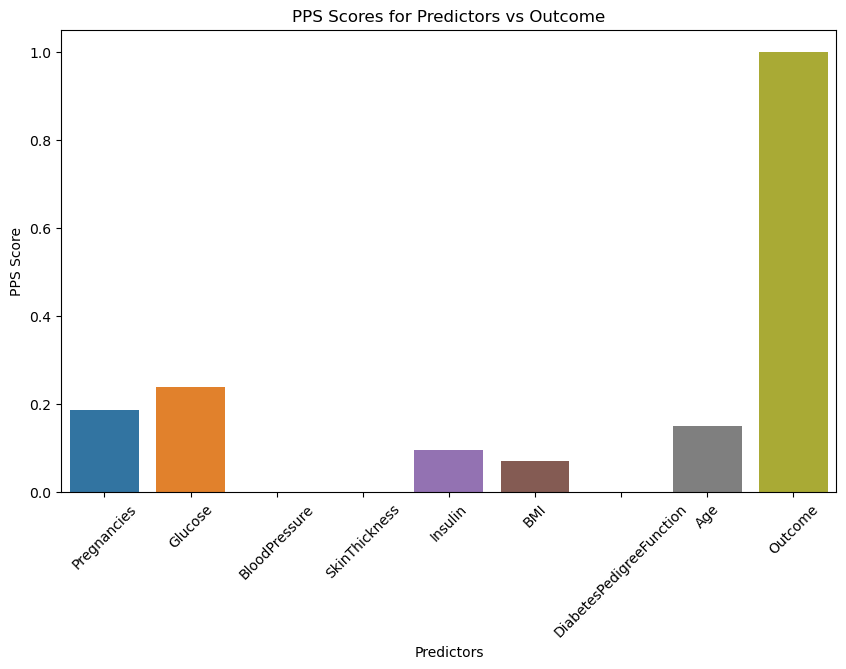

In [68]:
# Plot the PPS scores for predictors against the Outcome
plt.figure(figsize=(10, 6))
sns.barplot(x='x', y='ppscore', data=pps_outcome)

# Add labels and title to the plot
plt.title('PPS Scores for Predictors vs Outcome')
plt.xlabel('Predictors')
plt.ylabel('PPS Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.show() 

